In [131]:
# install segyio

pip install segyio

In [171]:
import numpy as np
import segyio
import matplotlib.pyplot as plt
import statistics as st

In [172]:
sys_segy= 'C:/Users/mohamed elgashti/Downloads/seismic.segy'
f = segyio.open(sys_segy, ignore_geometry = True)
print(segyio.tools.wrap(f.text[0]))

C 1 CLIENT                        COMPANY                       CREW NO
C 2 LINE            AREA                        MAP ID
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER
C 4 INSTRUMENT: MFG            MODEL            SERIAL NO
C 5 DATA TRACES/RECORD        AUXILIARY TRACES/RECORD         CDP FOLD
C 6 SAMPLE INTERNAL         SAMPLES/TRACE       BITS/IN      BYTES/SAMPLE
C 7 RECORDING FORMAT        FORMAT THIS REEL        MEASUREMENT SYSTEM
C 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED
C 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER
C10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT
C11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL
C12     PATTERN:                           LENGTH        WIDTH
C13 SWEEP: START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE
C14 TAPER: START LENGTH       MS  END LENGTH       MS  TYPE
C15 SPREAD: OFFSET        MAX DISTANCE        GROUP INTERVAL

In [173]:
ntraces = len(f.trace)
print(f'{ntraces} traces')
src_x = f.attributes(segyio.TraceField.SourceX)
grp_x = f.attributes(segyio.TraceField.GroupX)
src_x_unq = np.unique(src_x) # the length of this variable gives us the number of shots. 
grp_x_unq = np.reshape(grp_x,(1001,120)).T # every column represent common shot gather.


120120 traces


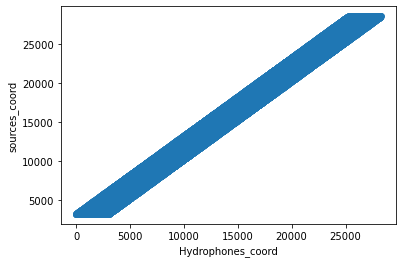

In [178]:
# plotting 'aquisition geometry'

fig, ax = plt.subplots()
ax.scatter(grp_x, src_x)
ax.set_xlabel('Hydrophones_coord')
ax.set_ylabel('sources_coord')
plt.show()

# from the plot we can see the distribution of the sources and recievers 'aquisition geometry'.

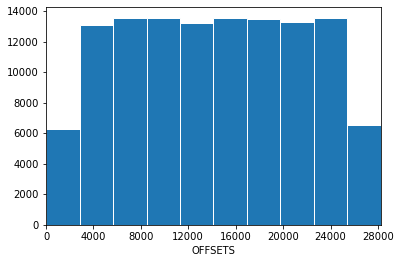

[5225,
 5250,
 5275,
 5300,
 5325,
 5350,
 5375,
 5400,
 5425,
 5450,
 5475,
 5500,
 5525,
 5550,
 5575,
 5600,
 5625,
 5650,
 5675,
 5700,
 5725,
 5750,
 5775,
 5800,
 5825,
 5850,
 5875,
 5900,
 5925,
 5950,
 5975,
 6000,
 6025,
 6050,
 6075,
 6100,
 6125,
 6150,
 6175,
 6200,
 6225,
 6250,
 6275,
 6300,
 6325,
 6350,
 6375,
 6400,
 6425,
 6450,
 6475,
 6500,
 6525,
 6550,
 6575,
 6600,
 6625,
 6650,
 6675,
 6700,
 6725,
 6750,
 6775,
 6800,
 6825,
 6850,
 6875,
 6900,
 6925,
 6950,
 6975,
 7000,
 7025,
 7050,
 7075,
 7100,
 7125,
 7150,
 7175,
 7200,
 7225,
 7250,
 7275,
 7300,
 7325,
 7350,
 7375,
 7400,
 7425,
 7450,
 7475,
 7500,
 7525,
 7550,
 7575,
 7600,
 7625,
 7650,
 7675,
 7700,
 7725,
 7750,
 7775,
 7800,
 7825,
 7850,
 7875,
 7900,
 7925,
 7950,
 7975,
 8000,
 8025,
 8050,
 8075,
 8100,
 8125,
 8150,
 8175,
 8200,
 8225,
 8250,
 8275,
 8300,
 8325,
 8350,
 8375,
 8400,
 8425,
 8450,
 8475,
 8500,
 8525,
 8550,
 8575,
 8600,
 8625,
 8650,
 8675,
 8700,
 8725,
 8750,
 8775,

In [182]:
# we can see from the histogram that the middle values of offsets are the most common.

fig, ax = plt.subplots()

ax.hist(grp_x, linewidth=1,edgecolor="white")
ax.set(xlim=(0, 28250), xticks=np.arange(0,28250,4000))
ax.set_xlabel('OFFSETS')

plt.show()


# we can find the most common offsets by using multimode.

modes=st.multimode(grp_x)

In [9]:
# finding the common mid-point and signed offset coordinates.

# the common mid-point = (g+s)/2


midp_cord=[]
for i in range(0,120120):
    
    a=(src_x[i]+grp_x[i])/2
    midp_cord.append(a)

# the offset = (g-s)/2

offset=[]
for i in range(0,120120):
    
    q=(grp_x[i]-src_x[i])/2
    offset.append(q)



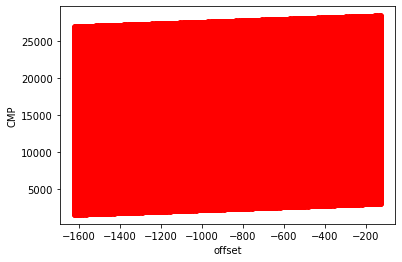

In [179]:
#plotting in mid-point-offset coord!

fig, ax = plt.subplots()

ax.scatter(offset, midp_cord, color='red')
ax.set_xlabel('offset')
ax.set_ylabel('CMP')
#ax.scatter(grp_x, src_x) for plotting coordinates'source/reciever' with the 'mid-point-offset coord'

plt.show()

In [37]:
#np.unique(offset)
#np.unique(midp_cord)
offset_unq = np.reshape(offset,(1001,120)).T
midp_cord_unq = np.reshape(midp_cord,(1001,120)).T

In [129]:
# MOST Important headers that i found!

OFFSET=f.attributes(segyio.TraceField.offset)
CDP=f.attributes(segyio.TraceField.CDP)
CDP_TRACE=f.attributes(segyio.TraceField.CDP_TRACE)
TRACE_SAMPLE_COUNT=f.attributes(segyio.TraceField.TRACE_SAMPLE_COUNT)
TRACE_SAMPLE_INTERVAL=f.attributes(segyio.TraceField.TRACE_SAMPLE_INTERVAL)             


{TRACE_SEQUENCE_LINE: 51, TRACE_SEQUENCE_FILE: 51, FieldRecord: 3, TraceNumber: 51, EnergySourcePoint: 101, CDP: 51, CDP_TRACE: 51, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 1, DataUse: 0, offset: -1987, ReceiverGroupElevation: -10, SourceSurfaceElevation: -6, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: 1, SourceGroupScalar: 1, SourceX: 3237, SourceY: 0, GroupX: 1250, GroupY: 0, CoordinateUnits: 3, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 48, TRACE_SAMPLE_COUNT: 1500, TRACE_SAMPLE_INTERVAL: 4000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, Swe

In [146]:
arr = np.array([[np.arange(0,120,dtype=int)],[np.ones(120,dtype=int)*119]])

s=np.arange(0,119).reshape(1,119)
w = np.ravel_multi_index( arr, (120,1001)) 

min_offset_Cmp= np.concatenate((s,w), axis=1, dtype=int) # trace numbers (index) with minimum offset for every cmp


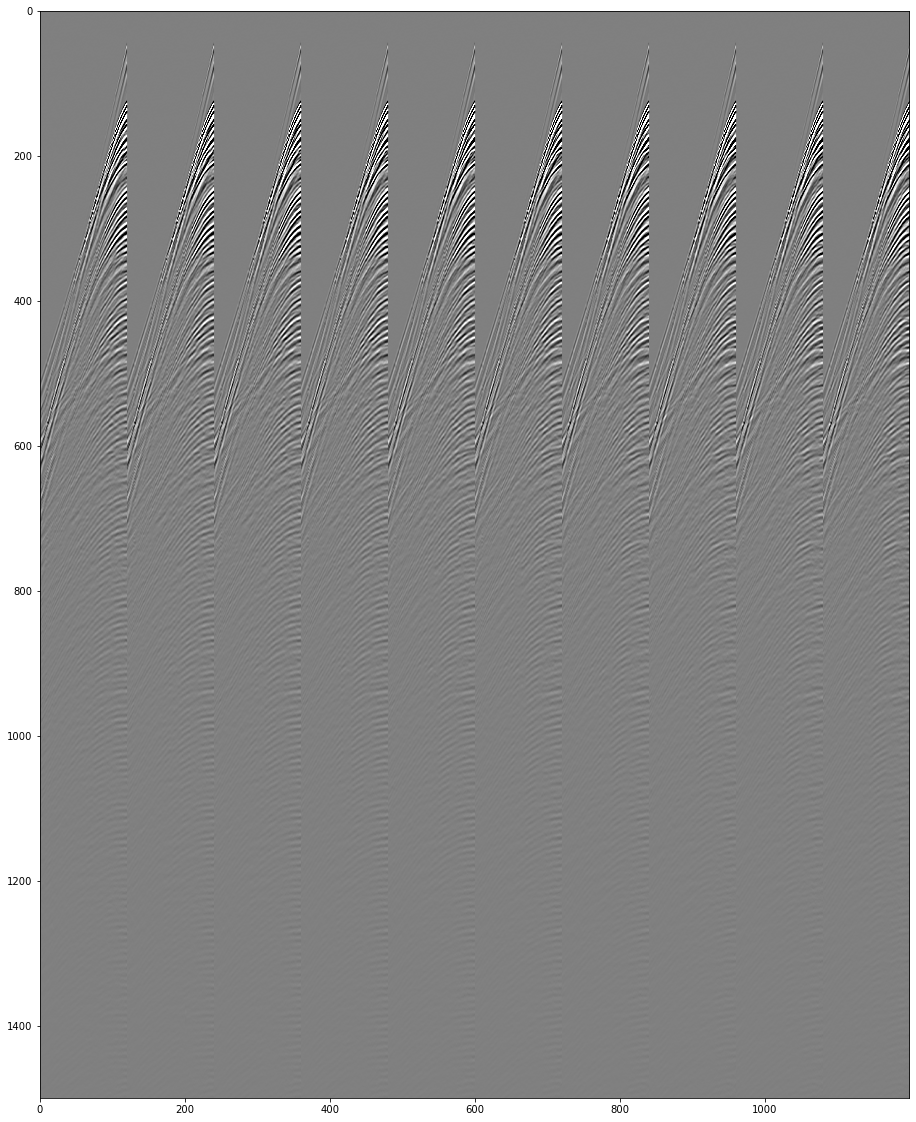

In [228]:
clip = 1e+2
vmin, vmax = -clip, clip

# Figure
figsize=(20, 20)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
im = axs[0].imshow(f.trace.raw[0:1200].T, cmap='gray', vmin=vmin, vmax=vmax)

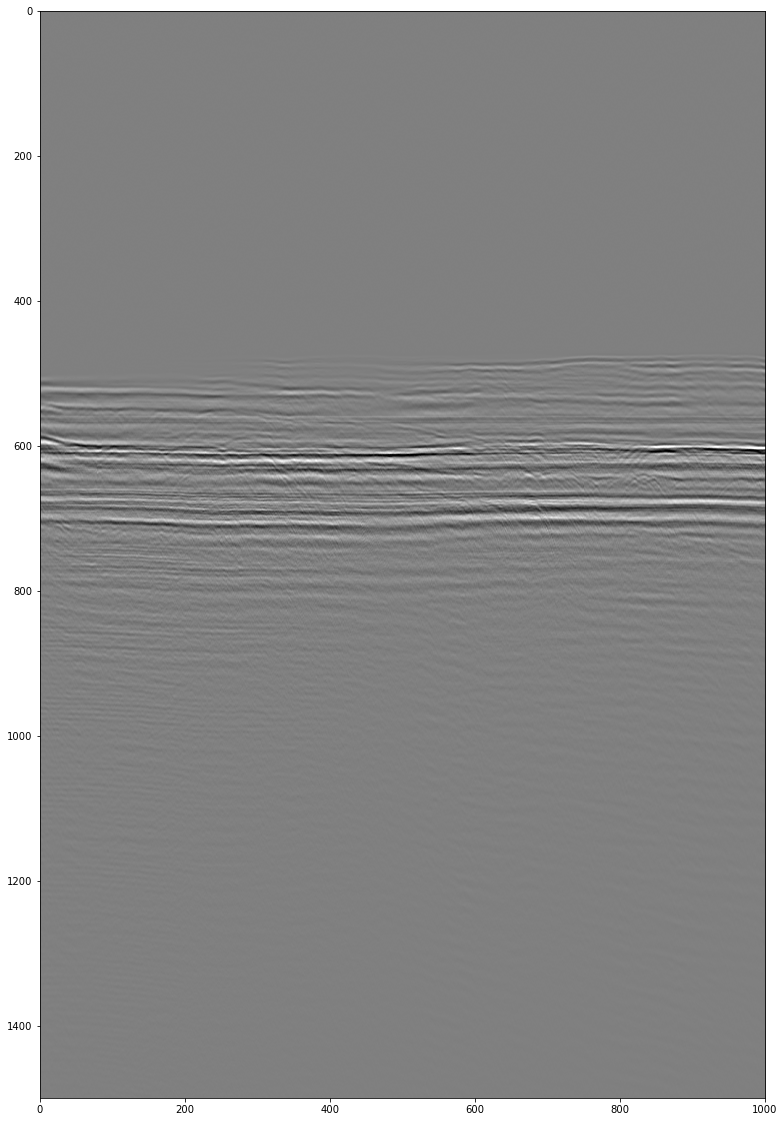

In [230]:
clip = 1e+2
vmin, vmax = -clip, clip

# Figure
figsize=(20, 20)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
im = axs[0].imshow(f.trace.raw[0::120].T, cmap='gray', vmin=vmin, vmax=vmax)

array([3237, 3237, 3262, 3287, 3312, 3337, 3362, 3387, 3412, 3437, 3462],
      dtype=int32)